In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
#Setting the Working Directory
os.chdir("C:/Users/rjnaw/Downloads")

In [3]:
#Loading the data
learning_1 = pd.read_csv("Personalized Learning .csv")
learning_2 = pd.read_excel("Personalized Learning .xlsx")

In [4]:
#Making a copy of the data
Personalized = learning_1.copy()
Personalized

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1,Male,Rahul Shah,Study,Mathematics,3.9,86,1,Kinesthetic,Fast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Female,Amit Patel,Swimming,Python,4.1,80,2,Visual,Slow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Male,Emily White,Music,Physics,4.0,63,2,Visual,Fast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,James Anderson,Swimming,Python,4.3,70,4,Auditory,Fast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Male,Vikram Malhotra,Swimming,Mathematics,3.4,78,3,Visual,Moderate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,Female,Rahul Shah,Art,Mathematics,3.2,96,2,Visual,Fast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,6997,Female,Vikram Malhotra,Gaming,Physics,3.1,82,4,Auditory,Slow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,6998,Male,Priya Singh,Gaming,Chemistry,4.8,85,3,Visual,Moderate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,6999,Male,Priya Singh,Gaming,Python,3.2,99,4,Auditory,Moderate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking for missing values
Personalized.isnull().sum()

Student Id                 0
Gender                     0
Name                       0
Hobby                      0
Course                     0
Course_Rating              0
Test_Score                 0
Study_Hours                0
Learning_Style             0
Learning_Pace              0
Motivation_Score           0
Parental_Involvement       0
Consistency                0
Self_Efficacy              0
Prior_Knowledge            0
Skill_Assessment           0
Autonomy_Level             0
Learning_Goals             0
Course_Description         0
Unnamed: 19             7000
Unnamed: 20             7000
Unnamed: 21             7000
Unnamed: 22             7000
Unnamed: 23             7000
Unnamed: 24             7000
Unnamed: 25             7000
Unnamed: 26             7000
Unnamed: 27             7000
Unnamed: 28             7000
Unnamed: 29             7000
Unnamed: 30             7000
Unnamed: 31             7000
dtype: int64

In [6]:
#Removing Unnamed columns
Personalized = Personalized.drop(columns =[col for col in Personalized.columns if 'Unnamed' in col])
Personalized.head()

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description
0,1,Male,Rahul Shah,Study,Mathematics,3.9,86,1,Kinesthetic,Fast,10,9,Low,8.9,Advanced,1.5,Low,Career Development,Mathematics: hands-on approach with focus on c...
1,2,Female,Amit Patel,Swimming,Python,4.1,80,2,Visual,Slow,1,1,Low,3.4,Advanced,5.3,High,Personal Growth,Python: practical approach with focus on creat...
2,3,Male,Emily White,Music,Physics,4.0,63,2,Visual,Fast,9,2,Low,10.0,Beginner,3.9,Low,Academic Excellence,Physics: theoretical approach with focus on pr...
3,4,Male,James Anderson,Swimming,Python,4.3,70,4,Auditory,Fast,4,2,High,2.8,Beginner,5.2,Medium,Career Development,Python: interactive approach with focus on cre...
4,5,Male,Vikram Malhotra,Swimming,Mathematics,3.4,78,3,Visual,Moderate,6,1,Medium,3.2,Advanced,9.8,Medium,Academic Excellence,Mathematics: interactive approach with focus o...


In [7]:
Personalized.isnull().sum()

Student Id              0
Gender                  0
Name                    0
Hobby                   0
Course                  0
Course_Rating           0
Test_Score              0
Study_Hours             0
Learning_Style          0
Learning_Pace           0
Motivation_Score        0
Parental_Involvement    0
Consistency             0
Self_Efficacy           0
Prior_Knowledge         0
Skill_Assessment        0
Autonomy_Level          0
Learning_Goals          0
Course_Description      0
dtype: int64

In [8]:
#Separate numerical and categorical columns
num_cols = Personalized.select_dtypes(include=['int64', 'float64']).columns
cat_cols = Personalized.select_dtypes(include=['object']).columns

#Fill numerical columns with median
Personalized[num_cols] = Personalized[num_cols].fillna(Personalized[num_cols].median())

#Fill categorical columns with mode
for col in cat_cols:
    if Personalized[col].isnull().sum() > 0:
            Personalized[col] = Personalized[col].fillna(Personalized[col].mode())

In [9]:
Personalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Id            7000 non-null   int64  
 1   Gender                7000 non-null   object 
 2   Name                  7000 non-null   object 
 3   Hobby                 7000 non-null   object 
 4   Course                7000 non-null   object 
 5   Course_Rating         7000 non-null   float64
 6   Test_Score            7000 non-null   int64  
 7   Study_Hours           7000 non-null   int64  
 8   Learning_Style        7000 non-null   object 
 9   Learning_Pace         7000 non-null   object 
 10  Motivation_Score      7000 non-null   int64  
 11  Parental_Involvement  7000 non-null   int64  
 12  Consistency           7000 non-null   object 
 13  Self_Efficacy         7000 non-null   float64
 14  Prior_Knowledge       7000 non-null   object 
 15  Skill_Assessment     

In [10]:
#Encode categorical varriables:-
label_encoders = {}
categorical_cols = ['Gender', 'Learning_Style', 'Learning_Pace', 'Prior_Knowledge', 'Learning_Goals'] 
for col in categorical_cols:
    le = LabelEncoder()
    Personalized[col] = le.fit_transform(Personalized[col])
    label_encoders[col] = le

Exploratory Data Analysis (EDA)

In [11]:
#Printing first 5 rows of the data:-
Personalized.head()

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description
0,1,1,Rahul Shah,Study,Mathematics,3.9,86,1,1,0,10,9,Low,8.9,0,1.5,Low,1,Mathematics: hands-on approach with focus on c...
1,2,0,Amit Patel,Swimming,Python,4.1,80,2,2,2,1,1,Low,3.4,0,5.3,High,2,Python: practical approach with focus on creat...
2,3,1,Emily White,Music,Physics,4.0,63,2,2,0,9,2,Low,10.0,1,3.9,Low,0,Physics: theoretical approach with focus on pr...
3,4,1,James Anderson,Swimming,Python,4.3,70,4,0,0,4,2,High,2.8,1,5.2,Medium,1,Python: interactive approach with focus on cre...
4,5,1,Vikram Malhotra,Swimming,Mathematics,3.4,78,3,2,1,6,1,Medium,3.2,0,9.8,Medium,0,Mathematics: interactive approach with focus o...


In [12]:
#Basic Structure:-
Personalized.describe()

,Student Id,Gender,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Learning_Goals
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,0.503857,3.997914,80.079429,3.498000,0.996000,1.003429,5.497571,5.445857,5.490986,0.992429,5.487257,1.523143
std,2020.870275,0.500021,0.581059,11.761233,1.711762,0.817361,0.818237,2.856624,2.876947,2.592690,0.813745,2.607234,1.112493
min,1.000000,0.000000,3.000000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1750.750000,0.000000,3.500000,70.000000,2.000000,0.000000,0.000000,3.000000,3.000000,3.300000,0.000000,3.200000,1.000000
50%,3500.500000,1.000000,4.000000,80.000000,4.000000,1.000000,1.000000,6.000000,5.000000,5.500000,1.000000,5.500000,2.000000
75%,5250.250000,1.000000,4.500000,90.000000,5.000000,2.000000,2.000000,8.000000,8.000000,7.800000,2.000000,7.700000,3.000000
max,7000.000000,1.000000,5.000000,100.000000,6.000000,2.000000,2.000000,10.000000,10.000000,10.000000,2.000000,10.000000,3.000000


In [13]:
Personalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Id            7000 non-null   int64  
 1   Gender                7000 non-null   int64  
 2   Name                  7000 non-null   object 
 3   Hobby                 7000 non-null   object 
 4   Course                7000 non-null   object 
 5   Course_Rating         7000 non-null   float64
 6   Test_Score            7000 non-null   int64  
 7   Study_Hours           7000 non-null   int64  
 8   Learning_Style        7000 non-null   int64  
 9   Learning_Pace         7000 non-null   int64  
 10  Motivation_Score      7000 non-null   int64  
 11  Parental_Involvement  7000 non-null   int64  
 12  Consistency           7000 non-null   object 
 13  Self_Efficacy         7000 non-null   float64
 14  Prior_Knowledge       7000 non-null   int64  
 15  Skill_Assessment     

In [14]:
#Learning Style  Distribution:-
Personalized['Learning_Style'].value_counts()

Learning_Style
0    2352
1    2324
2    2324
Name: count, dtype: int64

In [15]:
#Popular Courses:-
Personalized['Course'].value_counts()

Course
Literature     1228
Chemistry      1193
Python         1178
History        1150
Mathematics    1148
Physics        1103
Name: count, dtype: int64

Data Visualization:-

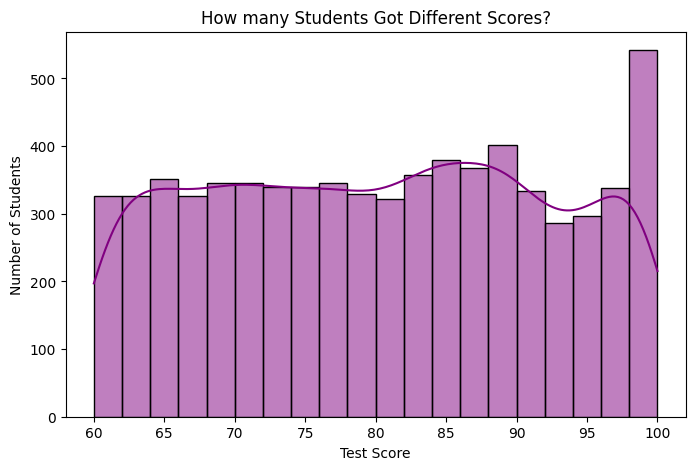

In [16]:
#Show Test Score Distrubution
plt.figure(figsize=(8, 5))
sns.histplot(Personalized['Test_Score'], bins=20, color='purple', kde=True)
plt.title("How many Students Got Different Scores?")
plt.xlabel("Test Score")
plt.ylabel("Number of Students")
plt.show()

C:\Users\rjnaw\AppData\Local\Temp\ipykernel_22248\2538264498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Course',data=Personalized, order=Personalized['Course'].value_counts().index, palette='viridis')


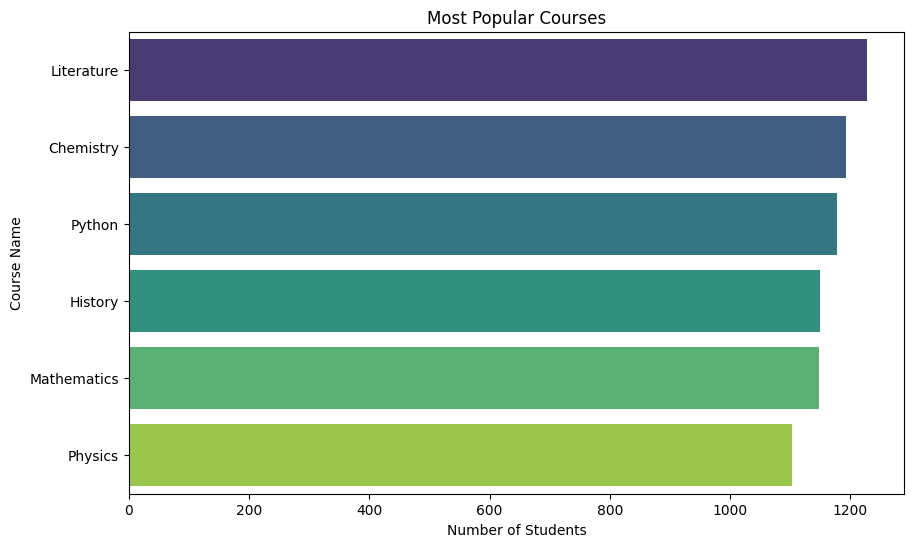

In [17]:
#Popular Courses Bar Chartt
plt.figure(figsize=(10, 6))
sns.countplot(y='Course',data=Personalized, order=Personalized['Course'].value_counts().index, palette='viridis')
plt.title("Most Popular Courses")
plt.xlabel("Number of Students")
plt.ylabel("Course Name")
plt.show()

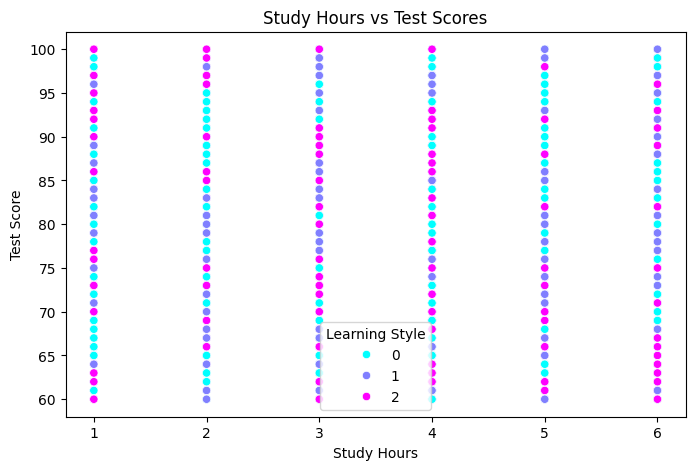

In [18]:
#Study hours vs Test Scores scatter Plot:-
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Study_Hours", y="Test_Score",data=Personalized, hue='Learning_Style', palette='cool')
plt.title("Study Hours vs Test Scores")
plt.xlabel("Study Hours")
plt.ylabel("Test Score")
plt.legend(title='Learning Style')
plt.show()

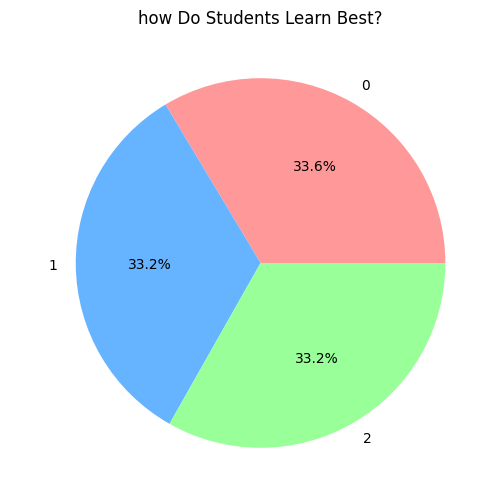

In [19]:
#Learning Styles Pie Chart:-
plt.figure(figsize=(6, 6))
Personalized['Learning_Style'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("how Do Students Learn Best?")
plt.ylabel(" ")
plt.show()

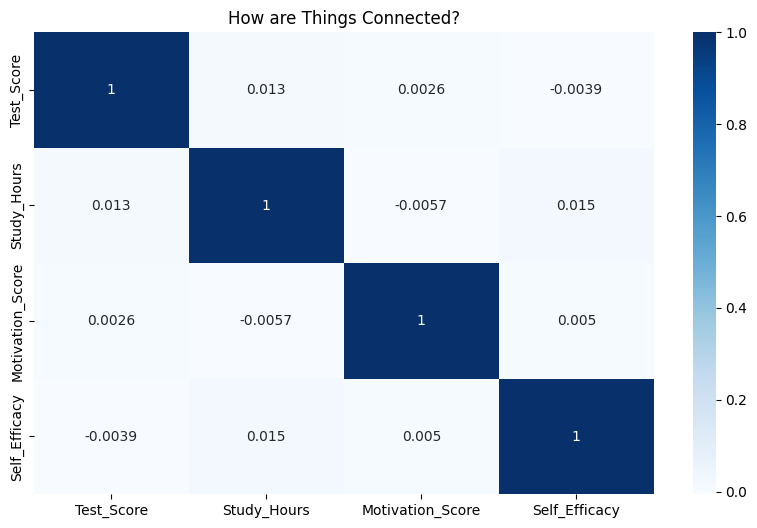

In [20]:
#Heatmap of correlation:-
plt.figure(figsize=(10, 6))
correlation_matrix = Personalized[['Test_Score', 'Study_Hours', 'Motivation_Score', 'Self_Efficacy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("How are Things Connected?")
plt.show()

In [21]:
#Feature Engineering:- 
Personalized['Study_Efficiency'] = Personalized['Test_Score']/Personalized['Study_Hours']
Personalized['Study_Efficiency']

0       86.000000
1       40.000000
2       31.500000
3       17.500000
4       26.000000
          ...    
6995    48.000000
6996    20.500000
6997    28.333333
6998    24.750000
6999    35.500000
Name: Study_Efficiency, Length: 7000, dtype: float64

In [22]:
Personalized

,Student Id,Gender,Name,Hobby,Course,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Consistency,Self_Efficacy,Prior_Knowledge,Skill_Assessment,Autonomy_Level,Learning_Goals,Course_Description,Study_Efficiency
0,1,1,Rahul Shah,Study,Mathematics,3.9,86,1,1,0,10,9,Low,8.9,0,1.5,Low,1,Mathematics: hands-on approach with focus on c...,86.000000
1,2,0,Amit Patel,Swimming,Python,4.1,80,2,2,2,1,1,Low,3.4,0,5.3,High,2,Python: practical approach with focus on creat...,40.000000
2,3,1,Emily White,Music,Physics,4.0,63,2,2,0,9,2,Low,10.0,1,3.9,Low,0,Physics: theoretical approach with focus on pr...,31.500000
3,4,1,James Anderson,Swimming,Python,4.3,70,4,0,0,4,2,High,2.8,1,5.2,Medium,1,Python: interactive approach with focus on cre...,17.500000
4,5,1,Vikram Malhotra,Swimming,Mathematics,3.4,78,3,2,1,6,1,Medium,3.2,0,9.8,Medium,0,Mathematics: interactive approach with focus o...,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,0,Rahul Shah,Art,Mathematics,3.2,96,2,2,0,5,3,Medium,4.7,0,5.5,Medium,1,Mathematics: interactive approach with focus o...,48.000000
6996,6997,0,Vikram Malhotra,Gaming,Physics,3.1,82,4,0,2,3,9,Low,1.6,2,4.4,High,1,Physics: interactive approach with focus on cr...,20.500000
6997,6998,1,Priya Singh,Gaming,Chemistry,4.8,85,3,2,1,10,1,High,8.1,1,2.6,High,2,Chemistry: practical approach with focus on cr...,28.333333
6998,6999,1,Priya Singh,Gaming,Python,3.2,99,4,0,1,8,7,Medium,5.4,2,9.9,Low,1,Python: practical approach with focus on analy...,24.750000


In [23]:
#Normalize Numerical Features:-
scaler = StandardScaler()
numerical_cols = ['Study_Hours', 'Motivation_Score', 'Parental_Involvement', 'Self_Efficacy', 'Skill_Assessment','Test_Score', 'Course_Rating']   
Personalized[numerical_cols] = scaler.fit_transform(Personalized[numerical_cols])

In [24]:
#Encoding Categorical Variables using one-hot encoding:-
Personalized = pd.get_dummies(Personalized, drop_first=True)
Personalized

,Student Id,Gender,Course_Rating,Test_Score,Study_Hours,Learning_Style,Learning_Pace,Motivation_Score,Parental_Involvement,Self_Efficacy,...,Course_Description_Python: interactive approach with focus on critical thinking,Course_Description_Python: interactive approach with focus on problem-solving,Course_Description_Python: practical approach with focus on analytical skills,Course_Description_Python: practical approach with focus on creative expression,Course_Description_Python: practical approach with focus on critical thinking,Course_Description_Python: practical approach with focus on problem-solving,Course_Description_Python: theoretical approach with focus on analytical skills,Course_Description_Python: theoretical approach with focus on creative expression,Course_Description_Python: theoretical approach with focus on critical thinking,Course_Description_Python: theoretical approach with focus on problem-solving
0,1,1,-0.168522,0.503433,-1.459419,1,0,1.576249,1.235475,1.314950,...,False,False,False,False,False,False,False,False,False,False
1,2,0,0.175702,-0.006754,-0.875184,2,2,-1.574548,-1.545449,-0.806550,...,False,False,False,True,False,False,False,False,False,False
2,3,1,0.003590,-1.452284,-0.875184,2,0,1.226160,-1.197834,1.739250,...,False,False,False,False,False,False,False,False,False,False
3,4,1,0.519925,-0.857066,0.293286,0,0,-0.524283,-1.197834,-1.037987,...,False,False,False,False,False,False,False,False,False,False
4,5,1,-1.029081,-0.176816,-0.290949,2,1,0.175894,-1.545449,-0.883696,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,0,-1.373305,1.353745,-0.875184,2,0,-0.174194,-0.850218,-0.305105,...,False,False,False,False,False,False,False,False,False,False
6996,6997,0,-1.545417,0.163308,0.293286,0,2,-0.874371,1.235475,-1.500859,...,False,False,False,False,False,False,False,False,False,False
6997,6998,1,1.380485,0.418402,-0.290949,2,1,1.576249,-1.545449,1.006368,...,False,False,False,False,False,False,False,False,False,False
6998,6999,1,-1.373305,1.608838,0.293286,0,1,0.876072,0.540244,-0.035096,...,False,False,True,False,False,False,False,False,False,False


In [29]:
X = Personalized.drop(['Test_Score', 'Student Id '],axis=1)
y = Personalized['Test_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"R² Score: {rf_regressor.score(X_test, y_test)}")

MSE: 2.1141270961553372e-30
R² Score: 1.0


In [32]:
y_train_class = y_train.astype(int)
y_test_class = y_test.astype(int)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)
predictions = rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_class, predictions)}")

Accuracy: 0.6785714285714286


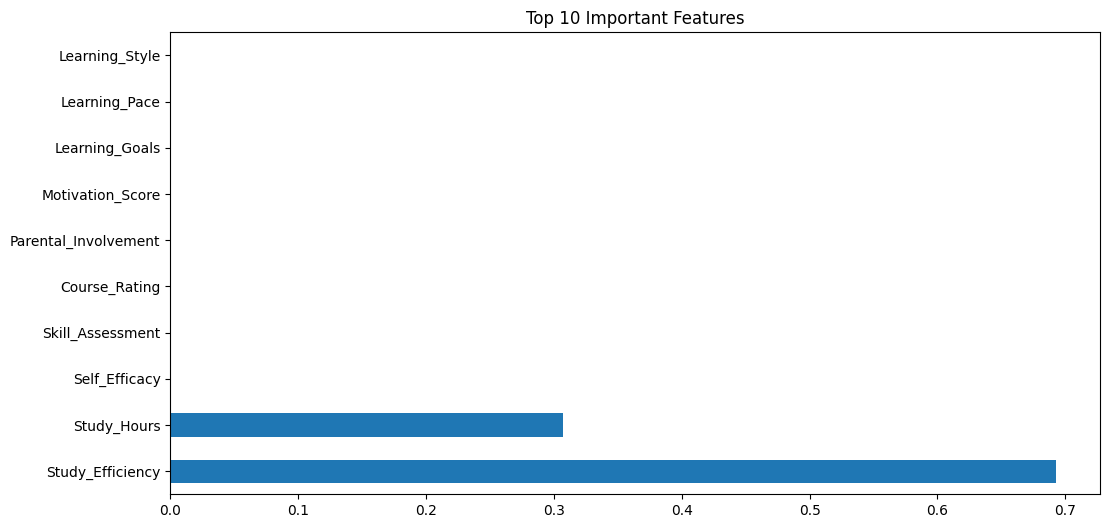

In [33]:
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(12,6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


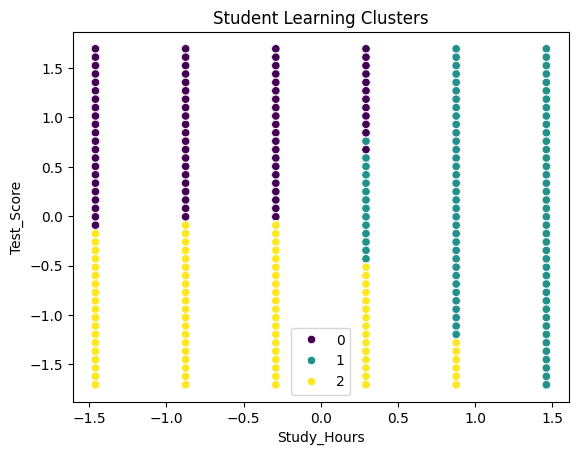

In [36]:
from sklearn.cluster import KMeans

# Cluster students based on learning characteristics
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Personalized[['Study_Hours', 'Test_Score', 'Motivation_Score']])

# Visualize clusters
sns.scatterplot(data=Personalized, x='Study_Hours', y='Test_Score', hue=clusters, palette='viridis')
plt.title("Student Learning Clusters")
plt.show()